<a href="https://colab.research.google.com/github/Sisipho-Hamlomo/Decision-tree/blob/main/Copy_of_Credit_Card_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline
import statistics
import pickle
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.patches as  mpatches
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from statistics import mean
from sklearn.feature_selection import RFECV
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.neural_network import  MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from google.colab import files
import io
#importing creditcard
D= pd.read_csv("https://query.data.world/s/3dwtejin6vc6r44dgd3vu66flypzon")
D.drop(D.columns[D.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
uploaded=files.upload()

Saving test_data.csv to test_data.csv


In [ ]:
#####Upload test dataset
test_data = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))
test_data.drop(test_data.columns[test_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_data.head()

In [ ]:
uploaded=files.upload()

Saving train_data.csv to train_data.csv


In [ ]:
#####Upload test dataset
train_data = pd.read_csv(io.BytesIO(uploaded['train_data.csv']))
train_data.drop(train_data.columns[train_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,154640.0,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,0.377643,0.386075,-0.650025,0.418040,-1.009056,0.225934,-0.738861,-0.068285,0.329703,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,7.13,0
1,139525.0,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,0.489890,0.247935,-1.055373,1.242616,-0.433066,-0.136620,-0.720880,0.328234,-0.016297,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,150.00,0
2,69778.0,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,-0.376936,0.191335,1.046362,0.420874,0.805190,-1.316514,0.059491,0.915477,-1.087435,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,1302.49,0
3,48473.0,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,0.009338,-0.341516,0.004210,-0.287098,1.385535,0.398955,-0.299877,0.403600,0.929925,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,4.49,0
4,129350.0,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,-0.331548,-0.180028,-0.254641,-0.388456,0.414223,0.048084,-0.710405,0.007241,-0.458141,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,4.49,0


In [ ]:
print(test_data[test_data['Class']==1].shape)
print(train_data[train_data['Class']==1].shape)

(148, 31)
(344, 31)


In [ ]:
print(test_data[test_data['Class']==0].shape)
print(train_data[train_data['Class']==0].shape)

(85295, 31)
(199020, 31)


In [ ]:
D.shape

(284807, 31)

















































































































































































































































**Data cleaning and processing**

In [ ]:
################################################################################
#Look for missing values
print('There are {} missing values in the dataset.'.format(np.sum(D.isnull().values.any()))) ##Check if there are any missing values
#Dataset with no zero amount transactions
creditdata=D.loc[D['Amount']!=0.00]
fraud_cases=D.loc[(D['Class']==1) & (D['Amount']!=0)]
non_fraud_cases=D.loc[(D['Class']==0) & (D['Amount']!=0)]
################################################################################
#Look for zero amounts in the non-fraudulent dataset
zero_amount_fraudulent_case=fraud_cases.loc[fraud_cases['Amount']==0.00]
#Look for zero amounts in the non-fraudulent dataset
zero_amount_nonfraudulent_case=non_fraud_cases.loc[non_fraud_cases['Amount']==0.00]
################################################################################
#Look for zero amounts
class1_zeroamounts=D.loc[(D['Class']==1) & (D['Amount']==0)]
class0_zeroamounts=D.loc[(D['Class']==0) & (D['Amount']==0)]
################################################################################
print('There are {} transcations in the fraudulent data and {} transcations in the non-fraudulent data that have zero amounts, the whole dataset has {} transcations with zero amounts'.format(np.sum(class1_zeroamounts['Amount']==0.00), np.sum(class0_zeroamounts['Amount']==0.00),np.sum(D['Amount']==0.00)))
#Divide dataset into fraudulent and non-fraudulent cases with zero amounts removed
fraud_cases=creditdata.loc[creditdata['Class']==1]
non_fraud_cases=creditdata.loc[creditdata['Class']==0]
non_fraud_cases.shape

There are 0 missing values in the dataset.
There are 27 transcations in the fraudulent data and 1798 transcations in the non-fraudulent data that have zero amounts, the whole dataset has 1825 transcations with zero amounts


(282517, 31)

In [ ]:
#Most frequent amount
print(statistics.mode(fraud_cases['Amount']))
print(statistics.mode(non_fraud_cases['Amount']))
print(np.sum(creditdata['Amount']==1.00))
print(max(fraud_cases['Amount']))

1.0
1.0
13688
2125.87


In [ ]:
all_bank_notes=creditdata.loc[creditdata['Amount']%10==0]
fraudulent_transaction_banknote=fraud_cases.loc[fraud_cases['Amount']%10==0] #fraud transaction bank notes
nonfraudulent_transaction_banknotes=non_fraud_cases[non_fraud_cases['Amount']%10==0] #Normal transcation bank notes
print("There are",np.sum(fraud_cases['Amount']%10==0),"bank notes in fraudulent transcations.")
print("There are",np.sum(non_fraud_cases['Amount']%10==0),"bank notes in normal transcations.")
print("There are",np.sum(creditdata['Amount']%10==0),"bank notes in the whole dataset")

There are 8 bank notes in fraudulent transcations.
There are 16250 bank notes in normal transcations.
There are 16258 bank notes in the whole dataset


In [ ]:
####################################################################################################################
#Remove bank notes from the fraud dataset i.e R10,R20,R30,...
cp_fraud=fraud_cases.loc[fraud_cases['Amount']%10==0] #Card not Present fraud
cnp_fraud=fraud_cases #Card present fraud
print(cp_fraud.shape)
print(cnp_fraud.shape)

(8, 31)
(465, 31)


In [ ]:
less2500=np.sum(creditdata['Amount']<2500)
more2500=np.sum(creditdata['Amount']>=2500)
print("{}% of the transactions have transaction amount less than 2500 and {}% have transaction amount more than 2500".format(round(less2500/len(creditdata)*100,3),round(more2500/len(creditdata)*100,3)))

99.841% of the transactions have transaction amount less than 2500 and 0.159% have transaction amount more than 2500


**Graphical representation of the dataset**

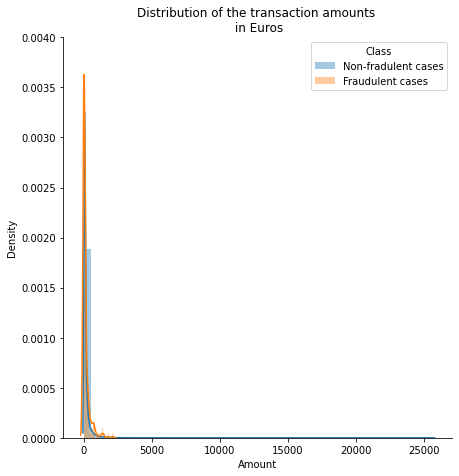

In [ ]:
#Plot histogram for Amount variable
g=sns.FacetGrid(creditdata,hue="Class", size=10,legend_out=False)
g.map(sns.distplot, "Amount")
g.add_legend()
plt.gcf().set_size_inches(6,6)
plt.ylim(0,0.004)
plt.title("Distribution of the transaction amounts \n in Euros")
new_labels = ['Non-fradulent cases', 'Fraudulent cases']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylabel("Density")
plt.show()
#Summary
#D['Amount'].describe()

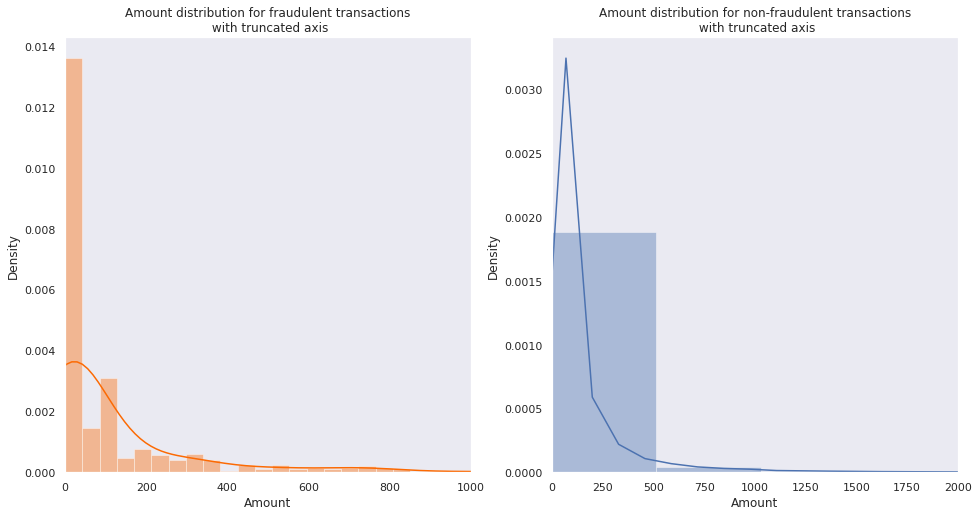

In [ ]:
sns.set(rc={"figure.figsize": (16, 8)})
fig, axes = plt.subplots(1,2)

sns.distplot(fraud_cases['Amount'],kde="true",ax=axes[0],color="#FC6A03")
sns.distplot(non_fraud_cases["Amount"],kde="True",ax=axes[1])
#Truncate the x-axis ?
axes[0].set_xlim(0,1000)
axes[1].set_xlim(0,2000)
##########################################################################
axes[0].set_title("Amount distribution for fraudulent transactions\n with truncated axis")
axes[1].set_title("Amount distribution for non-fraudulent transactions\n with truncated axis")
axes[0].grid(b=None)
axes[1].grid(b=None)
plt.show()

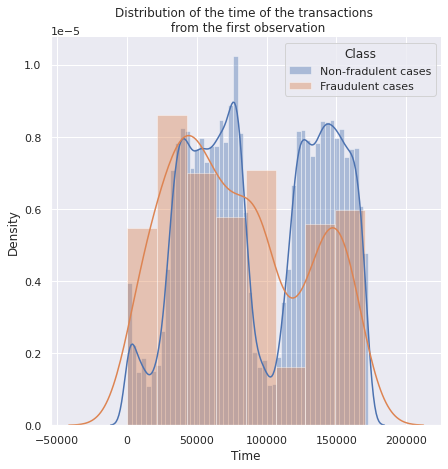

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [ ]:

#Plot histogram for Time variable
g=sns.FacetGrid(creditdata, hue="Class", size=10,legend_out=False)
g.map(sns.distplot, "Time")
g.add_legend()
plt.ylabel("Density")
plt.title("Distribution of the time of the transactions \n from the first observation")
plt.gcf().set_size_inches(6, 6)
new_labels = ['Non-fradulent cases', 'Fraudulent cases']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()
#Summary
D['Time'].describe()

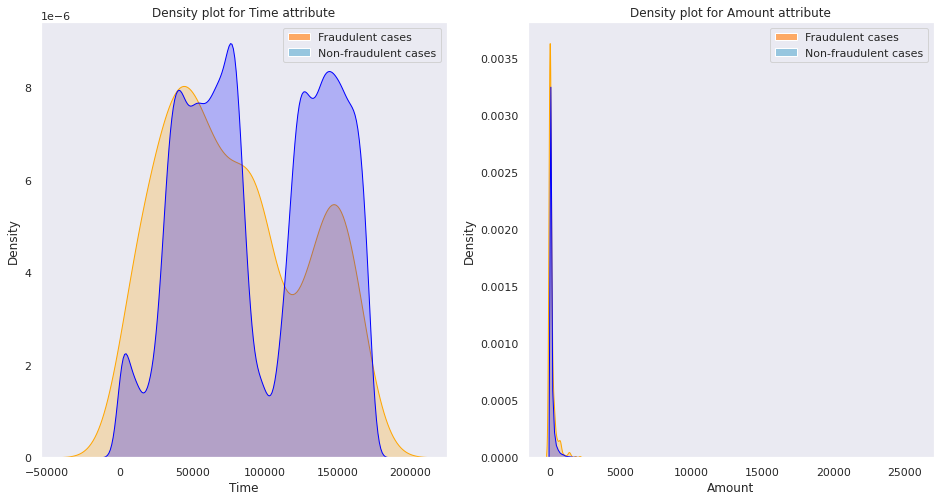

In [ ]:
sns.set(rc={"figure.figsize": (16, 8)})
fig, axes = plt.subplots(1,2)
sns.kdeplot(fraud_cases['Time'],color="Orange",shade=True,ax=axes[0],cmap="Oranges")
sns.kdeplot(non_fraud_cases["Time"],color="blue",shade=True,ax=axes[0],cmap="Blues")
sns.kdeplot(fraud_cases['Amount'],color="Orange",shade=True,ax=axes[1],cmap="Oranges")
sns.kdeplot(non_fraud_cases["Amount"],color="blue",shade=True,ax=axes[1],cmap="Blues")
axes[0].set_title("Density plot for Time attribute")
axes[1].set_title("Density plot for Amount attribute")
handles = [mpatches.Patch(facecolor=plt.cm.Oranges(100), label="Fraudulent cases"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Non-fraudulent cases")]
axes[0].legend(handles=handles)
axes[1].legend(handles=handles)
axes[0].grid(b=None)
plt.grid(b=None)
plt.show()

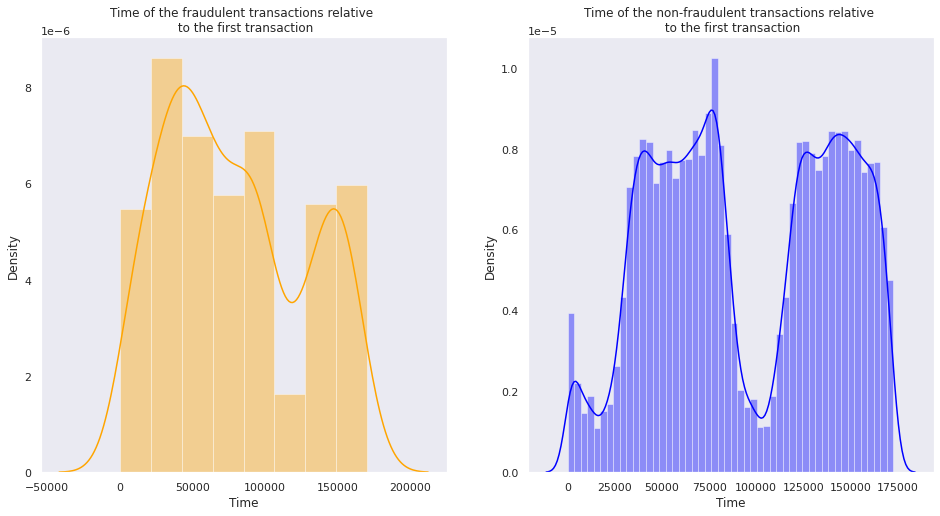

In [ ]:
sns.set(rc={"figure.figsize": (16, 8)})
fig, axes = plt.subplots(1,2)
sns.distplot(fraud_cases['Time'],color="orange",kde=True,ax=axes[0])
sns.distplot(non_fraud_cases["Time"],color="blue",kde=True,ax=axes[1])
axes[0].set_title("Time of the fraudulent transactions relative \n to the first transaction")
axes[1].set_title("Time of the non-fraudulent transactions relative \n to the first transaction")
axes[0].grid(b=None)
axes[1].grid(b=None)
plt.show()

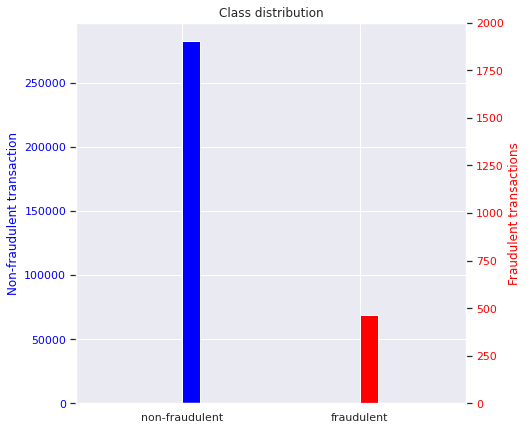

In [ ]:
# create figure and axis objects with subplots()
#Plot histogram for Class variable
fig, ax = plt.subplots(figsize=( 7,7))
# make a plot
ax.hist(non_fraud_cases['Class'], color="blue")
ax.set_ylabel("Non-fraudulent transaction",color="blue")
ax.tick_params(axis='y', labelcolor="blue")
plt.title('Class distribution')
#make a plot with different y-axis using second axis object
ax1=ax.twinx()
n,bins,patches=ax1.hist(fraud_cases['Class'],color="red")
ax1.set_ylabel("Fraudulent transactions",color="red")
ax1.set_xlabel("Class")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_ylim(0,2000)
labels=["non-fraudulent", "fraudulent"]
plt.xticks(range(2),labels)
plt.grid(b=None)
plt.show()

In [ ]:
creditdata=D

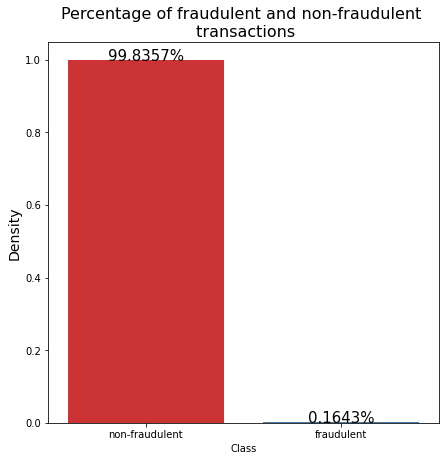

In [ ]:
#Ploting barplot for target
plt.figure(figsize=(7,7))
g = sns.barplot(creditdata['Class'], creditdata['Class'], palette='Set1', estimator=lambda x: len(x) / len(creditdata) )
#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        g.text(x+width/2,
               y+height,
               '{:.4%}'.format(height),
               horizontalalignment='center',fontsize=15)

#Setting the labels
#plt.xlabel('Class distribution', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Percentage of fraudulent and non-fraudulent \n transactions', fontsize=16)
labels=["non-fraudulent", "fraudulent"]
plt.xticks(range(2),labels)
plt.show()

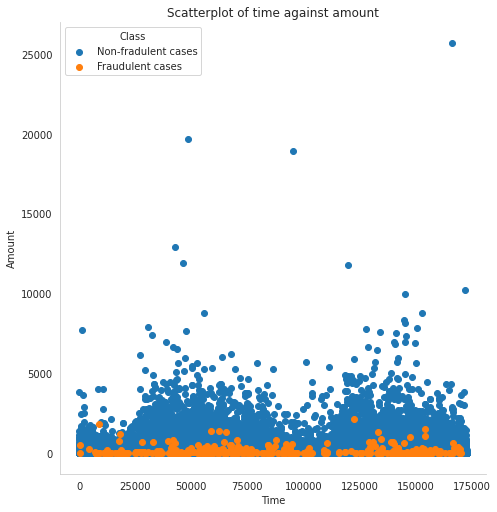

In [ ]:
sns.set_style("whitegrid")
g=sns.FacetGrid(creditdata, hue="Class", size = 7,legend_out=False)
g.map(plt.scatter, "Time", "Amount")
plt.title("Scatterplot of time against amount")
g.add_legend()
new_labels = ['Non-fradulent cases', 'Fraudulent cases']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.gcf().set_size_inches(7,7)
plt.grid(b=None)
plt.show()

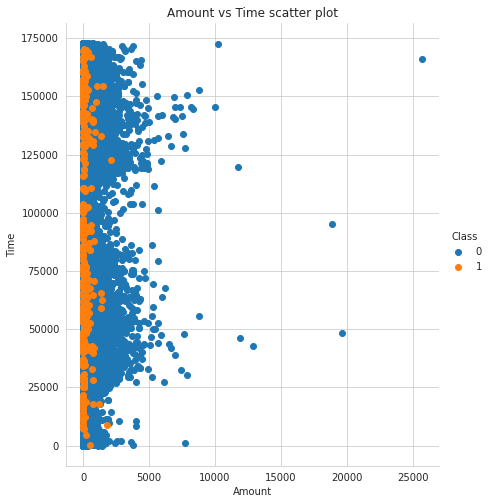

In [ ]:
sns.set_style("whitegrid")
g=sns.FacetGrid(creditdata, hue="Class", size = 6)
g.map(plt.scatter, "Amount", "Time")
plt.title("Amount vs Time scatter plot")
g.add_legend()
plt.gcf().set_size_inches(7,7)
plt.show()

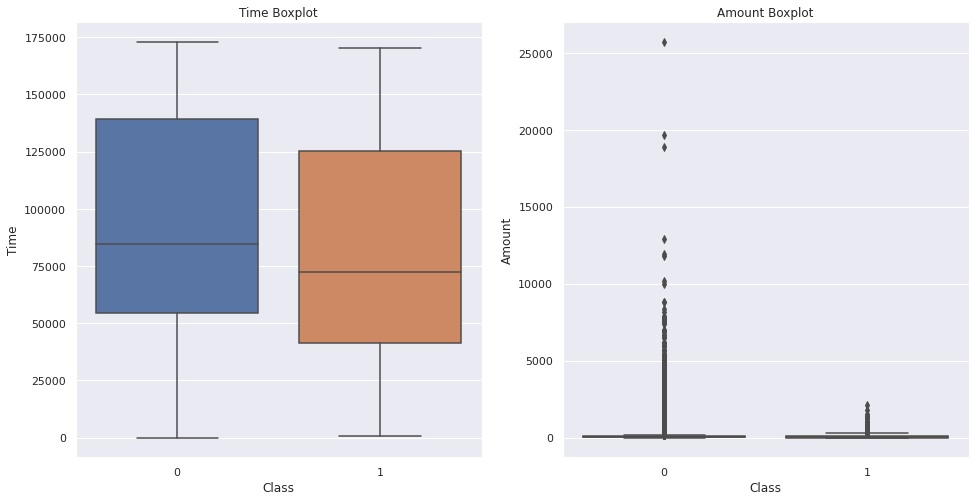

In [ ]:
sns.set(rc={"figure.figsize": (16, 8)})
fig, ax = plt.subplots(1,2)
g=sns.boxplot(x = "Class", y = "Time", data = creditdata,ax=ax[0])
sns.boxplot(x = "Class", y = "Amount", data = creditdata,ax=ax[1])#,order=['Non-fradulent \n cases','Fraudulent \n cases']
ax[0].set_title("Time Boxplot")
ax[1].set_title("Amount Boxplot")
plt.show()

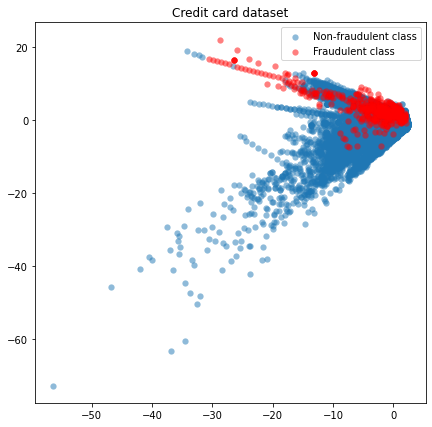

In [ ]:
def data_array(creditdata: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = creditdata.iloc[:, 1:30].values
    y = creditdata.Class.values
    return X, y

def plot(X: np.ndarray, y: np.ndarray):
    plt.figure(figsize=(7,7))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Non-fraudulent class", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraudulent class", alpha=0.5, linewidth=0.15, c='r')
    plt.title("Credit card dataset")
    plt.legend()
    return plt.show()

X,y=data_array(creditdata)
plot(X,y)

In [ ]:
#Are the means significantly different?
print(ttest_ind(fraud_cases['Time'],non_fraud_cases['Time'],equal_var=False))
##Since p-value is less than alpha, we reject H_o and conclude that there is a significant difference between the means.
stats.levene(fraud_cases['Time'],non_fraud_cases['Time'],center="mean")
#Is there significant difference in the population?
##Since the p-value is greater than alpha, we fail to reject H_o and conclude that there is insufficient evidence to say that there is a difference between the variances.

Ttest_indResult(statistic=-6.878060723054983, pvalue=1.963033177836053e-11)


LeveneResult(statistic=3.4531059672743587, pvalue=0.06313406542441932)

In [ ]:
#Are the means significantly different?
print(ttest_ind(fraud_cases['Amount'],non_fraud_cases['Amount'],equal_var=False))
##Since p-value is less than alpha, we reject H_o and conclude that there is a significant difference between the means.
stats.levene(fraud_cases['Amount'],non_fraud_cases['Amount'],center="mean")
#Is there significantl difference in the population?
##Since the p-value is less than alpha, we reject H_o clude that there is a significant difference between the population variance.

Ttest_indResult(statistic=3.342114544610147, pvalue=0.0008984593065075974)


LeveneResult(statistic=29.126921265949495, pvalue=6.784271511297845e-08)

In [ ]:
#Perform one-way Anova
################################################################################
model=ols('Class~Time+Amount+Time*Amount',data=creditdata).fit()
ano_table=sm.stats.anova_lm(model,typ=2)
print(ano_table)
################################################################################
print("The interaction effect is not significant")

                 sum_sq        df          F        PR(>F)
Time           0.077645       1.0  47.338988  5.983593e-12
Amount         0.020785       1.0  12.672517  3.711304e-04
Time:Amount    0.000568       1.0   0.346322  5.562032e-01
Residual     464.135950  282975.0        NaN           NaN
The interaction effect is not significant


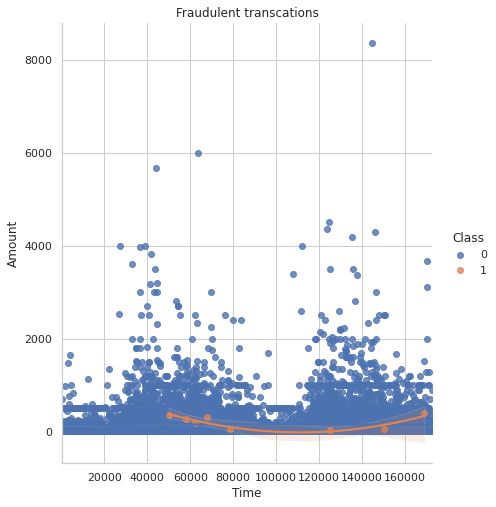

In [ ]:
#Bank notes, R10,R20,R30,........
sns.set_style("whitegrid")
sns.lmplot(x="Time",y="Amount",hue="Class",data=all_bank_notes,order = 2)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.gcf().set_size_inches(7,7)
plt.title("Fraudulent transcations")
plt.show()

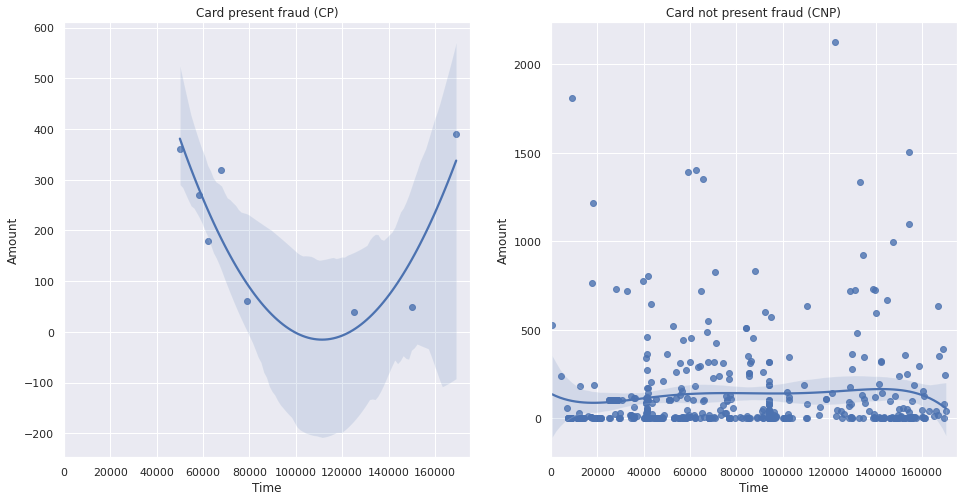

In [ ]:
sns.set(rc={"figure.figsize": (16, 8)})
fig, axes = plt.subplots(1,2)

sns.set_style("whitegrid")
sns.regplot(data=cp_fraud,x="Time",y="Amount",ax=axes[0],order = 2)
sns.regplot(data=cnp_fraud,x="Time",y="Amount",order = 5)
axes[0].set_xlim(0,175000)
axes[1].set_xlim(0,175000)
axes[0].set_title("Card present fraud (CP)")
axes[1].set_title("Card not present fraud (CNP)")
plt.show()

In [ ]:
#The money stolen between 0 and 50000 seconds
sum=0
for i in range(len(creditdata)):
  if((creditdata.iloc[i]['Time']>=0 and creditdata.iloc[i]["Time"]<=50000) and creditdata.iloc[i]['Class']==1):
    sum=sum + creditdata.iloc[i]['Amount']
print("The money stolen between 0 and 50000 seconds is R",round(sum,2))
################################################################################
#The money stolen between 50000 and 100000 seconds
sum=0
for i in range(len(creditdata)):
  if((creditdata.iloc[i]['Time']>50000 and creditdata.iloc[i]["Time"]<=100000) and creditdata.iloc[i]['Class']==1):
    sum=sum + creditdata.iloc[i]['Amount']
print("The money stolen between 50000 and 100000 seconds is ",round(sum,2))
################################################################################
#The money stolen between 50000 and 100000 seconds
sum=0
for i in range(len(creditdata)):
  if((creditdata.iloc[i]['Time']>100000 and creditdata.iloc[i]["Time"]<=150000) and creditdata.iloc[i]['Class']==1):
    sum=sum + creditdata.iloc[i]['Amount']
print("The money stolen between 100000 and 150000 seconds is ",round(sum,2))
################################################################################
#The money stolen above 150000 seconds
sum=0
for i in range(len(creditdata)):
  if(creditdata.iloc[i]['Time']>150000 and creditdata.iloc[i]['Class']==1):
    sum=sum + creditdata.iloc[i]['Amount']
print("The money stolen above 150000 seconds is R",round(sum,2))
################################################################################
total_amount=np.sum(D['Amount'])
stolen_amount_percentage=(np.sum(fraud_cases['Amount'])/total_amount)*100
print("The stolen amount percentage is",round(stolen_amount_percentage,2),'%')
print("Total stolen amount",np.sum(fraud_cases['Amount']))

The money stolen between 0 and 50000 seconds is R 15537.42
The money stolen between 50000 and 100000 seconds is  22671.17
The money stolen between 100000 and 150000 seconds is  15442.25
The money stolen above 150000 seconds is R 6477.13
The stolen amount percentage is 0.24 %
Total stolen amount 60127.97


<BarContainer object of 3 artists>

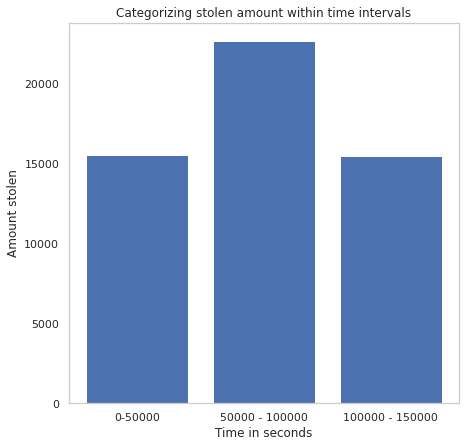

In [ ]:
data = {'0-50000': 15537.42, '50000 - 100000': 22671.17, '100000 - 150000': 15442.25}
time_interval = list(data.keys())
amount = list(data.values())

fig, axs = plt.subplots(figsize=(7,7))
plt.title("Categorizing stolen amount within time intervals")
plt.xlabel("Time in seconds")
plt.ylabel("Amount stolen")
plt.grid(b=None)
plt.bar(time_interval, amount,align='center')

Text(0.5, 1.0, 'Multiple collinearity of Credit Card Attributes')

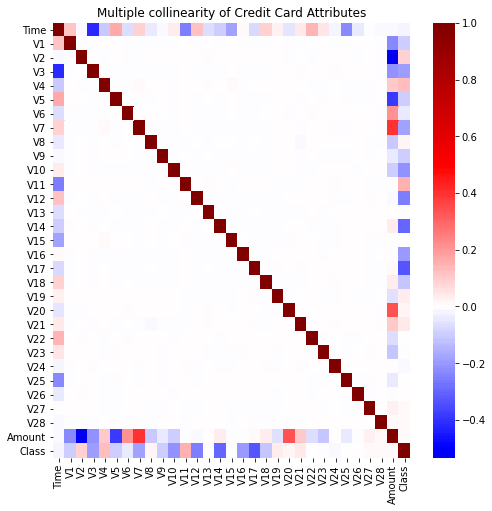

In [ ]:
#Heatmap for the dataset
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(creditdata.corr(), center=0, cmap='seismic', annot=False)
ax.set_title('Multiple collinearity of Credit Card Attributes')
#Most attributes are not correlated to each other.
#Amount has strong negative correlation with V2,V5 and positive correlation with V7,V20
#Time has strong negative relationship with V3

**Manual Datatset balancing without replpacement**

In [ ]:
from sklearn import ensemble
from statistics import mean
rf_scores= []
oob_scores=[]
index=465
for i,j in zip(range(0,607),range(1,608)):
  non_fraud_cases_indexed=non_fraud_cases.iloc[i*index:j*index]
  balanced_dataset=pd.concat([non_fraud_cases_indexed,fraud_cases])
  #balanced_dataset_shuffled=shuffle(balanced_dataset)
  X = balanced_dataset.drop('Class', axis=1)
  y = balanced_dataset['Class']
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42) # 70% training and 30% test
  rf = ensemble.RandomForestClassifier(oob_score=True)
  rf = rf.fit(X_train, y_train)
  scores= rf.score(X_test, y_test)
  rf_scores.append(scores)
  oob_scores.append(rf.oob_score_)
print("The average accuracy is",mean(rf_scores))
print('The average oob error is',1-mean(oob_scores))

The average accuracy is 0.9872396709830945
The average oob error is 0.011959803318680962


In [ ]:
rf_var= []
index=465
for k in range(0,10):
  shuffle(non_fraud_cases)
  for i,j in zip(range(0,607),range(1,608)):
    non_fraud_cases_indexed=non_fraud_cases.iloc[i*index:j*index]
    balanced_dataset=pd.concat([non_fraud_cases_indexed,fraud_cases])
    #balanced_dataset_shuffled=shuffle(balanced_dataset)
    X = balanced_dataset.drop('Class', axis=1)
    y = balanced_dataset['Class']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42) # 70% training and 30% test
    rf = ensemble.RandomForestClassifier()
    rf = rf.fit(X_train, y_train)
    scores= rf.score(X_test, y_test)
    rf_var.append(scores)
  print("The average accuracy is",mean(rf_var))
#print('The average oob error is',1-mean(oob_scores))

In [ ]:
best_n = np.argmax(oob_scores)+1
print(best_n)

961


In [ ]:
sum(np.var(non_fraud_cases))

2254217558.1014514

In [ ]:
oob_scores=[]
rf_scores=[]
for i in range(0,961):
  sampled_dataset=non_fraud_cases.sample(n=465,replace=True)
  balanced_dataset=pd.concat([sampled_dataset,fraud_cases])
  X = balanced_dataset.drop('Class', axis=1)
  y = balanced_dataset['Class']
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42) # 70% training and 30% test
  rf = ensemble.RandomForestClassifier(oob_score=True)
  rf = rf.fit(X_train, y_train)
  scores= rf.score(X_test, y_test)
  rf_scores.append(scores)
  oob_scores.append(rf.oob_score_)
print("The average accuracy is",mean(rf_scores))

The average accuracy is 0.9435213468646385


In [ ]:
from sklearn.utils import shuffle
########################################################
sampled_dataset=non_fraud_cases.sample(n=465,replace=False)
balanced_dataset=pd.concat([sampled_dataset,fraud_cases])
X = balanced_dataset.drop('Class', axis=1)
y = balanced_dataset['Class']
X,y=shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # 70% training and 30% test
lr = LogisticRegression().fit(X_train, y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))
#######################################################

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        97
           1       0.94      0.89      0.91        89

    accuracy                           0.92       186
   macro avg       0.92      0.92      0.92       186
weighted avg       0.92      0.92      0.92       186



In [ ]:
print("Number of normal cases",np.sum(y_train==0))
print("Number of normal cases",np.sum(y_train==1))

Number of normal cases 376
Number of normal cases 368


In [ ]:
from sklearn.utils import shuffle
mean_accuracy=[]
mean_acc=[]
for i in range(0,50):
  shuffle(non_fraud_cases)
  rf_scores=[]
  for k in range(0,20):
    sampled_dataset=non_fraud_cases.sample(n=465,replace=True)
    balanced_dataset=pd.concat([sampled_dataset,fraud_cases])
    X = balanced_dataset.drop('Class', axis=1)
    y = balanced_dataset['Class']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0) # 70% training and 30% test
    rf = ensemble.RandomForestClassifier(oob_score=True)
    rf = rf.fit(X_train, y_train)
    scores= rf.score(X_test, y_test)
    rf_scores.append(scores)
  mean_accuracy.append(mean(rf_scores))
  mean_acc.append(mean(rf_scores))
print("The average accuracy is",mean(rf_scores))

The average accuracy is 0.9543010752688172


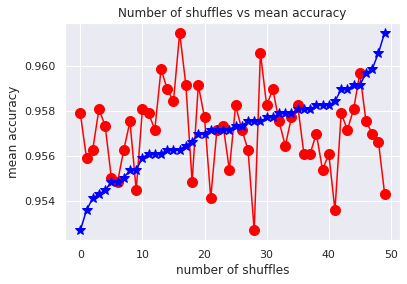

In [ ]:
#Sort the mean accuracies
mean_acc.sort()
plt.plot([x for x in range(0,50)], mean_accuracy, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=10)
plt.plot([x for x in range(0,50)], mean_acc, color='blue', linestyle='solid', marker='*',markerfacecolor='blue', markersize=10)
plt.title('Number of shuffles vs mean accuracy')
plt.ylabel('mean accuracy')
plt.xlabel('number of shuffles')
plt.show()

**Support Vector Machine**

In [ ]:
from sklearn.preprocessing import StandardScaler
creditdata_1=creditdata
creditdata_1['Amount(Normalized)'] = StandardScaler().fit_transform(creditdata_1['Amount'].values.reshape(-1,1))
creditdata_1['Time(Normalized)'] = StandardScaler().fit_transform(creditdata_1['Time'].values.reshape(-1,1))

In [ ]:
creditdata_normalized = creditdata_1.drop(columns = ['Amount', 'Time'], axis=1)
creditdata=creditdata.drop(['Amount(Normalized)','Time(Normalized)'],axis=1)

In [ ]:
creditdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = creditdata.drop('Class', axis=1)
y = creditdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42) # 70% training and 30% test
print(X_train.shape)
print(X_test.shape)

(198087, 30)
(84895, 30)


**Visualizing the training dataset**


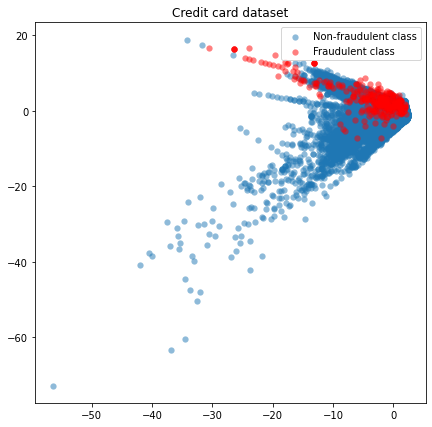

In [ ]:
def data_array(X_train: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = X_train.iloc[:, 1:30].values
    y = y_train.values
    return X, y

X,y=data_array(X_train)

def plot(X: np.ndarray, y: np.ndarray):
    plt.figure(figsize=(7,7))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Non-fraudulent class", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraudulent class", alpha=0.5, linewidth=0.15, c='r')
    plt.title("Credit card dataset")
    plt.legend()
    return plt.show()

plot(X,y)

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm_clf = svm.SVC(C=100,kernel='rbf', probability=True)
#Train the model using the training sets
svm_clf .fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Predict the response for test dataset
y_pred = svm_clf.predict_proba(X_test)
y_hat=svm_clf.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.00      0.00      0.00       140

    accuracy                           1.00     84895
   macro avg       0.50      0.50      0.50     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
#Predict the response for train dataset
y_pred_tr = svm_clf.predict(X_train)
y_hat=svm_clf.predict(X_test)
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.00      0.00      0.00       325

    accuracy                           1.00    198087
   macro avg       0.50      0.50      0.50    198087
weighted avg       1.00      1.00      1.00    198087



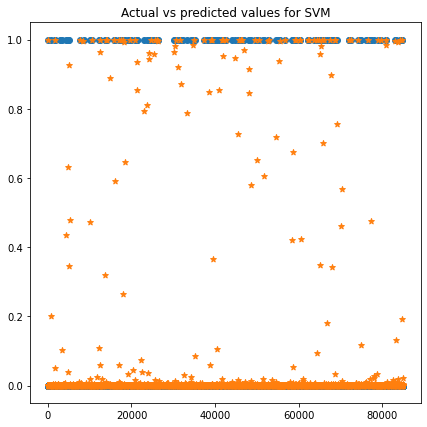

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter([i for i in range(0,len(y_test))], y_test,marker='o')
plt.scatter([i for i in range(0,len(y_test))], y_pred[:,1],marker='*')
plt.title("Actual vs predicted values for SVM")
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: Avearge precision=0.80')

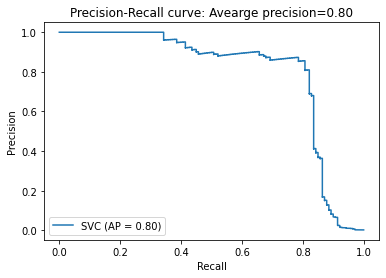

In [ ]:
average_precision = average_precision_score(y_test, y_pred[:,1])
svm_pr_curve = plot_precision_recall_curve(svm_clf, X_test, y_test)
svm_pr_curve.ax_.set_title('Precision-Recall curve: '
                   'Avearge precision={0:0.2f}'.format(average_precision))

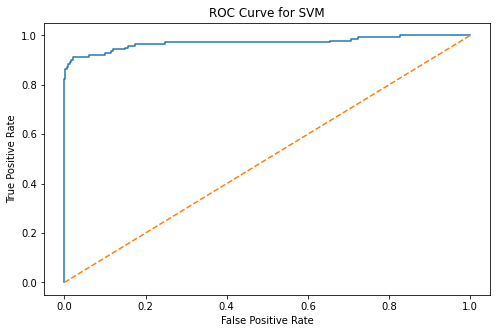

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob=svm_clf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(8,5))
plt.title('ROC Curve for SVM')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('The geometric mean for svm is {}'.format(geometric_mean_score(y_test,np.round(y_pred[:,1],0))))

The geometric mean for svm is 0.8105908766426966


In [ ]:
print('ROC_AUC_Score for SVM: ', roc_auc_score(y_test, prob))

ROC_AUC_Score for SVM:  0.9703632318363014


**Cost Sensitive SVM**

In [ ]:
#Create a svm Classifier
svm_cs = svm.SVC(kernel='rbf',C=1E8, probability=True, class_weight={0:1,1:304})
#Train the model using the training sets
svm_cs.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svm_cs.predict_proba(X_test)

In [ ]:
import pickle
# Save the trained model as a pickle string.
saved_svm_cs = pickle.dumps(svm_cs)
# Load the pickled model
svm_cs_from_pickle = pickle.loads(saved_svm_cs)
# Use the loaded pickled model to make predictions
y_pred_cs=svm_cs_from_pickle.predict(X_test)
y_pred_svm_cs=svm_cs_from_pickle.predict_proba(X_test)
print(classification_report(y_test,y_pred_cs))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    113007
           1       0.16      0.84      0.27       186

    accuracy                           0.99    113193
   macro avg       0.58      0.92      0.63    113193
weighted avg       1.00      0.99      0.99    113193



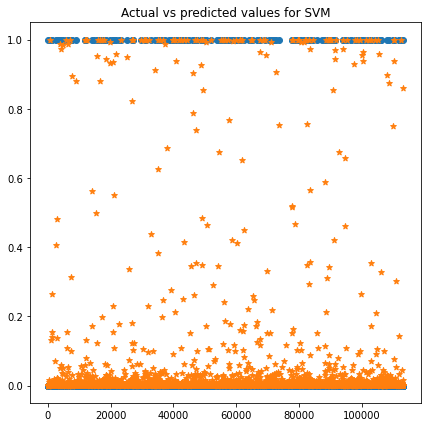

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter([i for i in range(0,len(y_test))], y_test,marker='o')
plt.scatter([i for i in range(0,len(y_test))], y_pred_svm_cs[:,1],marker='*')
plt.title("Actual vs predicted values for SVM")
plt.show()

**Smote and Tomek Link**

In [ ]:
from imblearn.combine import SMOTETomek
X_smt,y_smt=SMOTETomek(random_state=42).fit_sample(X_train,y_train)
X_train, X_test, y_train, y_test =train_test_split(X_smt,y_smt,test_size=0.4,stratify=y_smt,random_state=42)

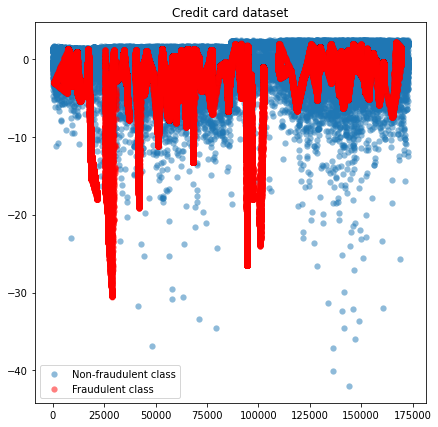

In [ ]:
def data_array(X_train: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = X_train
    y = y_train
    return X, y

X,y=data_array(X_train)

def plot(X: np.ndarray, y: np.ndarray):
    plt.figure(figsize=(7,7))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Non-fraudulent class", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraudulent class", alpha=0.5, linewidth=0.15, c='r')
    plt.title("Credit card dataset")
    plt.legend()
    return plt.show()

plot(X,y)

In [ ]:
#svm_clf .fit(X_train, y_train)
#Predict the response for test dataset
svm_bal = svm.SVC().fit(X_train,y_train)
y_pred = svm_bal.predict_proba(X_test)

In [ ]:
y_pred= svm_bal.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82    118264
           1       1.00      0.57      0.73    118264

    accuracy                           0.79    236528
   macro avg       0.85      0.79      0.78    236528
weighted avg       0.85      0.79      0.78    236528



**K-nearest neighbor(KNN)**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#X=creditdata.drop('Class', axis=1)
#y=creditdata['Class']
Xs=creditdata_normalized.drop('Class',axis=1)
ys=creditdata_normalized['Class']
X_train, X_test, y_train, y_test=train_test_split(Xs,ys,test_size=0.3,stratify=y, random_state=42)
knn=KNeighborsClassifier().fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.92      0.81      0.86       140

    accuracy                           1.00     84895
   macro avg       0.96      0.90      0.93     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
y_tr=knn.predict(X_train)

In [ ]:
print(classification_report(y_train,y_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.95      0.77      0.85       325

    accuracy                           1.00    198087
   macro avg       0.97      0.89      0.93    198087
weighted avg       1.00      1.00      1.00    198087



**KNN GridSearch**

In [ ]:
#Knn grid search
from sklearn.model_selection import GridSearchCV
n_neighbors=[i for i in range(2,7)]
p=[1,2]
param_grid={'n_neighbors':n_neighbors,'p':p}
grid_knn=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,n_jobs=-1,verbose=True, scoring='recall')
best_knn=grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 83.8min finished


In [ ]:
print(best_knn.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')


In [ ]:
knn_hyp = KNeighborsClassifier(n_neighbors = 3,p=1).fit(X_train,y_train)
predict=knn_hyp.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.91      0.80      0.85       140

    accuracy                           1.00     84895
   macro avg       0.96      0.90      0.93     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
knn_hyp = KNeighborsClassifier(n_neighbors = 3,p=1).fit(X_train,y_train)
predict_train=knn_hyp.predict(X_train)

In [ ]:
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.97      0.80      0.87       325

    accuracy                           1.00    198087
   macro avg       0.98      0.90      0.94    198087
weighted avg       1.00      1.00      1.00    198087



Text(0.5, 1.0, 'Precision-Recall curve: Avearge precision=0.80')

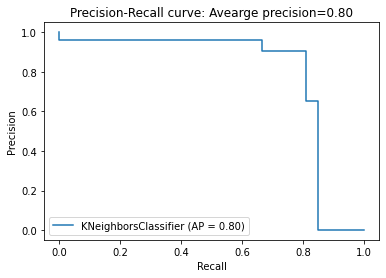

In [ ]:
Knn_hat=knn.predict_proba(X_test)[:,1]
average_precision = average_precision_score(y_test, Knn_hat)
svm_pr_curve = plot_precision_recall_curve(knn, X_test, y_test)
svm_pr_curve.ax_.set_title('Precision-Recall curve: '
                   'Avearge precision={0:0.2f}'.format(average_precision))

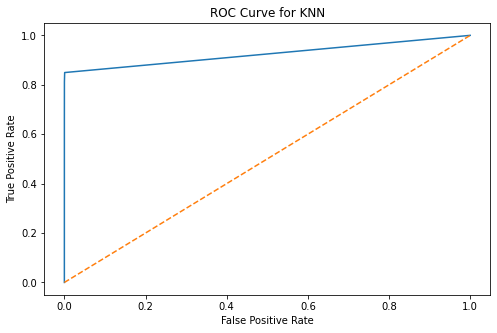

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Knn_hat)
fig, ax = plt.subplots(figsize=(8,5))
plt.title('ROC Curve for KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X=creditdata_normalized.drop('Class',axis=1)
y=creditdata_normalized['Class']

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
auc_score =[]
recall_scor=[]
precision_scor=[]
geo_score=[]
f1=[]
mcc=[]
i=1
for train_index,test_index in kf.split(X,y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    xtrain,xtest = X.iloc[train_index],X.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

    #model
    knn_hyp = KNeighborsClassifier(n_neighbors = 3,p=1).fit(xtrain,ytrain)
    score = roc_auc_score(ytest,knn_hyp.predict(xtest))
    score1 = recall_score(ytest,knn_hyp.predict(xtest))
    score2 = precision_score(ytest,knn_hyp.predict(xtest))
    score3=geometric_mean_score(ytest,knn_hyp.predict(xtest))
    score4=f1_score(ytest,knn_hyp.predict(xtest))
    score5=matthews_corrcoef(ytest,knn_hyp.predict(xtest))
    #######################################################################################################
    auc_score.append(score)
    recall_scor.append(score1)
    precision_scor.append(score2)
    geo_score.append(score3)
    f1.append(score4)
    mcc.append(score5)

    i+=1

In [ ]:
print('KNN auc mean score:',mean(auc_score))
print('KNN recall mean score:',mean(recall_scor))
print('KNN precision mean score:',mean(precision_scor))
print('KNN geometric mean score:',mean(geo_score))
print('KNN f1 mean score:',mean(f1))
print('KNN MCC mean score:',mean(mcc))

KNN auc mean score: 0.8881646599437086
KNN recall mean score: 0.7764107308048104
KNN precision mean score: 0.943087438537255
KNN geometric mean score: 0.8808076326408305
KNN f1 mean score: 0.8501645844769082
KNN MCC mean score: 0.8547270680487765


In [ ]:
#Test dataset
auc=roc_auc_score(y_test,knn_hyp.predict_proba(X_test)[:,1])
prec = precision_score(y_test, knn_hyp.predict(X_test))
rec = recall_score(y_test, knn_hyp.predict(X_test))
f1 = f1_score(y_test, knn_hyp.predict(X_test))
gmean=geometric_mean_score(y_test,knn_hyp.predict(X_test))
mcc=matthews_corrcoef(y_test,knn_hyp.predict(X_test))
print("\tprecision:%0.4f"%prec,"\trecall:%0.4f"%rec,"\tF1-score:%0.4f"%f1,"\tgeometric mean:%0.4f"%gmean,"\troc auc:%0.4f"%auc,"\MCC:%0.4f"%mcc)

**SMOTE and Tomek**

In [ ]:
from imblearn.combine import SMOTETomek
X_smt,y_smt=SMOTETomek(random_state=42).fit_sample(X_train,y_train)
X_train, X_test, y_train, y_test =train_test_split(X_smt,y_smt,test_size=0.3,random_state=42)

In [ ]:
knn.fit(X_smt,y_smt)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     67542
           1       0.99      1.00      0.99     67538

    accuracy                           0.99    135080
   macro avg       0.99      0.99      0.99    135080
weighted avg       0.99      0.99      0.99    135080



In [ ]:
 from sklearn.naive_bayes import GaussianNB
 gnb = GaussianNB().fit(X_train,y_train)
 y_pred=gnb.predict(X_test)
 print(classification_report(y_test,y_pred))
 print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     78843
           1       0.99      0.75      0.85     78843

    accuracy                           0.87    157686
   macro avg       0.89      0.87      0.87    157686
weighted avg       0.89      0.87      0.87    157686

Number of mislabeled points out of a total 157686 points : 20206


Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
#Basic Logistic regression on raw dataset
X = creditdata_normalized.drop('Class', axis=1)
y = creditdata_normalized['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42) # 70% training and 30%

lr = LogisticRegression().fit(X_train, y_train)
y_pred=lr.predict(X_test)
yhat=lr.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.90      0.57      0.70       140

    accuracy                           1.00     84895
   macro avg       0.95      0.79      0.85     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
y_pred_train=lr.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.86      0.60      0.71       325

    accuracy                           1.00    198087
   macro avg       0.93      0.80      0.85    198087
weighted avg       1.00      1.00      1.00    198087



In [ ]:
#Basic Logistic regression on normalized dataset
Xs=creditdata_normalized.drop('Class',axis=1)
ys=creditdata_normalized['Class']
X_train, X_test, y_train, y_test=train_test_split(Xs,ys,test_size=0.3,stratify=ys, random_state=42)
lr_norm=LogisticRegression().fit(X_train,y_train)
y_pred=lr_norm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.90      0.57      0.70       140

    accuracy                           1.00     84895
   macro avg       0.95      0.79      0.85     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
y_pred_train=lr_norm.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.86      0.60      0.71       325

    accuracy                           1.00    198087
   macro avg       0.93      0.80      0.85    198087
weighted avg       1.00      1.00      1.00    198087



In [ ]:
#Logistic regression grid search
from sklearn.model_selection import GridSearchCV
#iter=[i for i in range(100,1000,100)]
param_grid={'C':[1E3,1E4,1E5,1E5],'solver':['lbfgs','newton-cg','sag','saga'], 'penalty':['l2','l1','elasticnet','none']}
grid_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=5,n_jobs=-1,verbose=True, scoring='recall')
grid_lr.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 13.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1000.0, 10000.0, 100000.0, 100000.0],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=True)

In [ ]:
print(grid_lr.best_estimator_)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_hyp = LogisticRegression(C=1000,solver='newton-cg',penalty='l2',max_iter=1000).fit(X_train, y_train)
y_pred=lr_hyp.predict(X_test)
yhat=lr_hyp.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.90      0.57      0.70       140

    accuracy                           1.00     84895
   macro avg       0.95      0.79      0.85     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
from sklearn.linear_model import LogisticRegression
#Basic Logistic regression on raw dataset
X = creditdata.drop('Class', axis=1)
y = creditdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42) # 70% training and 30%

lr_raw = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred=lr_raw.predict(X_test)
yhat=lr_raw.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.89      0.63      0.74       140

    accuracy                           1.00     84895
   macro avg       0.94      0.81      0.87     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
y_pred_train=lr_raw.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.84      0.61      0.71       325

    accuracy                           1.00    198087
   macro avg       0.92      0.81      0.85    198087
weighted avg       1.00      1.00      1.00    198087



In [ ]:
def data_array(creditdata: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)
    xtrain=X_train.iloc[:,0:30].values
    xtest=X_test.iloc[:,0:30].values
    ytrain=y_train.values
    ytest= y_test.values
    return xtrain, xtest,ytrain,ytest

In [ ]:
xtrain,xtest,ytrain,ytest=data_array(creditdata)
xtrain.shape #flatten training dataset

(198087, 30)

In [ ]:
X_train.shape

(199364, 30)

In [ ]:
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0,
                              method='.632', alpha=0.05, n_splits=40):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func,
                                      n_splits=n_splits, random_seed=random_seed,
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)

    return estimate, lower_bound, upper_bound, stderr

In [ ]:
# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtrain, ytrain,scoring_func=recall_score)
print(f"recall estimate on training dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

recall estimate on training dataset: 0.5906, confidence interval: [0.5260, 0.6694], standard error: 0.0355


In [ ]:
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtrain, ytrain, scoring_func=precision_score)
print(f"precision estimate on training dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

precision estimate on training dataset: 0.8014, confidence interval: [0.7428, 0.8429], standard error: 0.0293


In [ ]:
#95% confidence interval
n_splits=[40,60,80,100,120,140]
for i in n_splits:
  est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=recall_score, n_splits=i)
  print(f"recall estimate on test dataset: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], " f"standard error: {stderr:.2f}")

recall estimate on test dataset: 0.65, confidence interval: [0.51, 0.75], standard error: 0.06
recall estimate on test dataset: 0.65, confidence interval: [0.50, 0.75], standard error: 0.06
recall estimate on test dataset: 0.66, confidence interval: [0.51, 0.76], standard error: 0.06
recall estimate on test dataset: 0.66, confidence interval: [0.50, 0.76], standard error: 0.07
recall estimate on test dataset: 0.65, confidence interval: [0.50, 0.76], standard error: 0.06
recall estimate on test dataset: 0.65, confidence interval: [0.50, 0.77], standard error: 0.07


In [ ]:
  #99% confidence interval
  est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=recall_score,alpha=0.01)
  print(f"recall estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

recall estimate on test dataset: 0.65, confidence interval: [0.50, 0.76], standard error: 0.06


In [ ]:
n_splits=[40,60,80,100,120,140,300]
for i in n_splits:
  est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=precision_score,n_splits=i)
  print(f"precision estimate on test dataset: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], " f"standard error: {stderr:.2f}")

precision estimate on test dataset: 0.85, confidence interval: [0.78, 0.92], standard error: 0.04
precision estimate on test dataset: 0.85, confidence interval: [0.75, 0.92], standard error: 0.05
precision estimate on test dataset: 0.85, confidence interval: [0.78, 0.92], standard error: 0.04
precision estimate on test dataset: 0.85, confidence interval: [0.72, 0.92], standard error: 0.05
precision estimate on test dataset: 0.85, confidence interval: [0.73, 0.92], standard error: 0.05
precision estimate on test dataset: 0.85, confidence interval: [0.72, 0.92], standard error: 0.05


In [ ]:
  #99% confidence interval
  est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=precision_score,alpha=0.01)
  print(f"precision estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

precision estimate on test dataset: 0.85, confidence interval: [0.78, 0.94], standard error: 0.04


In [ ]:
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=roc_auc_score)
print(f"roc_auc estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

roc_auc estimate on test dataset: 0.8248, confidence interval: [0.7565, 0.8728], standard error: 0.0311


In [ ]:
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=geometric_mean_score)
print(f"Geometric estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

Geometric estimate on test dataset: 0.8046, confidence interval: [0.7163, 0.8634], standard error: 0.0395


In [ ]:
#Test dataset
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#rint('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f)
print("\tprecision:%0.4f"%prec,"\trecall:%0.4f"%rec,"\tF1-score:%0.4f"%f1)

	precision:0.8318 	recall:0.6014 	F1-score:0.6980


In [ ]:
#Train dataset
prec = precision_score(ytrain, y_pred_train)
rec = recall_score(ytrain, y_pred_train)
f1 = f1_score(ytrain, y_pred_train)
#rint('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f)
print("\tprecision:%0.4f"%prec,"\trecall:%0.4f"%rec,"\tF1-score:%0.4f"%f1)

	precision:0.8716 	recall:0.6512 	F1-score:0.7454


In [ ]:
print('ROC_AUC_Score for LR: ', roc_auc_score(ytest, yhat[:,1]))

ROC_AUC_Score for LR:  0.9247363284499108


In [ ]:
X=creditdata.drop('Class',axis=1)
y=creditdata['Class']

In [ ]:
kf = StratifiedKFold(n_splits=40,shuffle=True,random_state=42)
auc_score =[]
recall_scor=[]
precision_scor=[]
geo_score=[]
i=1
for train_index,test_index in kf.split(X,y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    xtrain,xtest = X.iloc[train_index],X.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

    #model
    lr = LogisticRegression(max_iter=1000).fit(xtrain, ytrain)
    score = roc_auc_score(ytest,lr.predict(xtest))
    score1 = recall_score(ytest,lr.predict(xtest))
    score2 = precision_score(ytest,lr.predict(xtest))
    score3=geometric_mean_score(ytest,lr.predict(xtest))
    #print('ROC AUC score:',score)
    auc_score.append(score)
    recall_scor.append(score1)
    precision_scor.append(score2)
    geo_score.append(score3)

    i+=1

Logistic regrission auc mean score: 0.8048127446399886
Logistic regrission recall mean score: 0.6098484848484849
Logistic regrission precision mean score: 0.8423705570745045
Logistic regrission precision mean score: 0.7764591296410601


In [ ]:
print('Logistic regrission auc mean score:',mean(auc_score))
print('Logistic regrission recall mean score:',mean(recall_scor))
print('Logistic regrission precision mean score:',mean(precision_scor))
print('Logistic regrission geometric mean score:',mean(geo_score))

Logistic regrission auc mean score: 0.8048127446399886
Logistic regrission recall mean score: 0.6098484848484849
Logistic regrission precision mean score: 0.8423705570745045
Logistic regrission geometric mean score: 0.7764591296410601


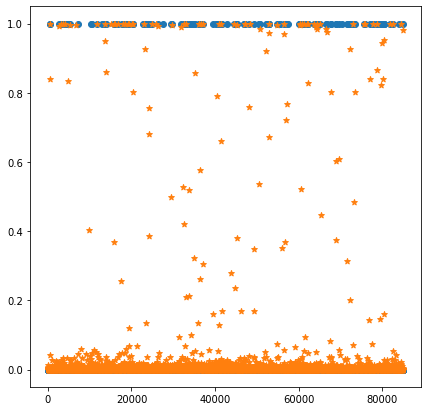

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter([i for i in range(0,len(y_test))], y_test,marker='o')
plt.scatter([i for i in range(0,len(y_test))], yhat[:,1],marker='*')
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: Avearge precision=0.72')

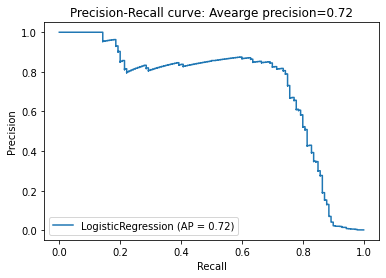

In [ ]:
average_precision = average_precision_score(y_test, yhat[:,1])
svm_pr_curve = plot_precision_recall_curve(lr, X_test, y_test)
svm_pr_curve.ax_.set_title('Precision-Recall curve: '
                   'Avearge precision={0:0.2f}'.format(average_precision))

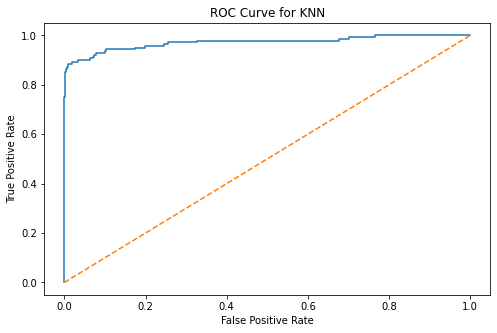

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat[:,1])
fig, ax = plt.subplots(figsize=(8,5))
plt.title('ROC Curve for KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('The geometric mean for LR is {}'.format(geometric_mean_score(y_test,y_pred)))

The geometric mean for LR is 0.7837037023819966


In [ ]:
print('ROC_AUC_Score for LR: ', roc_auc_score(y_test, yhat[:,1]))

ROC_AUC_Score for LR:  0.9247363284499108


In [ ]:
selector = RFECV(estimator=lr_hyp,step=3,cv=5,scoring='roc_auc')
selector = selector.fit(X_train,y_train)
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 12
Selected Features: [False False False False  True False False False  True  True  True False
 False  True  True False  True False False False False  True  True  True
 False False  True  True False False]
Feature Ranking: [7 3 4 5 1 6 3 6 1 1 1 6 3 1 1 4 1 5 4 2 2 1 1 1 7 5 1 1 2 7]


**SMOTE and Tomek Link**

In [ ]:
X_smt,y_smt=SMOTETomek(random_state=42).fit_sample(X_train,y_train)
X_train, X_test, y_train, y_test =train_test_split(X_smt,y_smt,test_size=0.3,random_state=42)

In [ ]:
lr_hyp.fit(X_smt,y_smt)
y_pred=lr_hyp.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     59161
           1       0.99      0.97      0.98     59125

    accuracy                           0.98    118286
   macro avg       0.98      0.98      0.98    118286
weighted avg       0.98      0.98      0.98    118286



Decision Tree

In [ ]:
X=creditdata.drop('Class',axis=1)
y=creditdata['Class']
#Stratify y to keep the ratio of class 0 and class 1 the same
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
yhat=dt.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.72      0.76      0.74       140

    accuracy                           1.00     84895
   macro avg       0.86      0.88      0.87     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
#Decision tree is overfitting
y_pred_t=dt.predict(X_train)
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       1.00      1.00      1.00       325

    accuracy                           1.00    198087
   macro avg       1.00      1.00      1.00    198087
weighted avg       1.00      1.00      1.00    198087



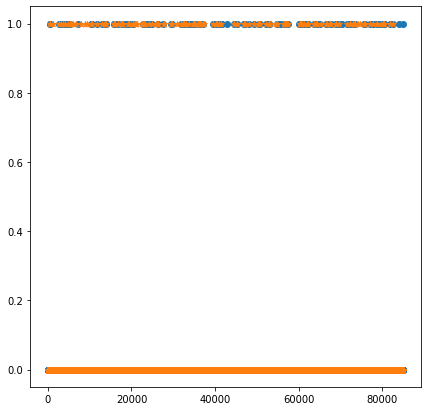

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter([i for i in range(0,len(y_test))], y_test,marker='o')
plt.scatter([i for i in range(0,len(y_test))], yhat[:,1],marker='*')
plt.show()

**Decision Tree GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy'],'max_depth':[3,5,7,9],'min_samples_split':[2,4,6], 'min_samples_leaf':[1,3,5]}
grid_dt=GridSearchCV(estimator=dt, param_grid=param_grid,scoring='recall',verbose=True,cv=5,n_jobs=-1)
best_dt=grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 21.0min finished


In [ ]:
print(best_dt.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
dt_hyp=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
dt_hyp.fit(X_train,y_train)
y_pred=dt_hyp.predict(X_test)
yhat=dt_hyp.predict_proba(X_test)
#There is an increase in precision and recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.82      0.78      0.80       140

    accuracy                           1.00     84895
   macro avg       0.91      0.89      0.90     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
y_pred_tr=dt_hyp.predict(X_train)
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.86      0.82      0.84       325

    accuracy                           1.00    198087
   macro avg       0.93      0.91      0.92    198087
weighted avg       1.00      1.00      1.00    198087



In [ ]:
#Test dataset
auc=roc_auc_score(y_test, yhat[:,1])
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gmean=geometric_mean_score(y_test,y_pred)
mcc=matthews_corrcoef(y_test,y_pred)
print("\tprecision:%0.4f"%prec,"\trecall:%0.4f"%rec,"\tF1-score:%0.4f"%f1,"\tgeometric mean:%0.4f"%gmean,"\troc auc:%0.4f"%auc,"\MCC:%0.4f"%mcc)

	precision:0.8195 	recall:0.7786 	F1-score:0.7985 	geometric mean:0.8822 	roc auc:0.9392 \MCC:0.7985


In [ ]:
#K-Fold cross validation
kf = StratifiedKFold(n_splits=40,shuffle=True,random_state=42)
auc_score =[]
recall_scor=[]
precision_scor=[]
geo_score=[]
f1=[]
mcc=[]
i=1
for train_index,test_index in kf.split(X,y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    xtrain,xtest = X.iloc[train_index],X.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

    #model
    dt_hyp=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
    dt_hyp.fit(xtrain, ytrain)
    score = roc_auc_score(ytest,dt_hyp.predict(xtest))
    score1 = recall_score(ytest,dt_hyp.predict(xtest))
    score2 = precision_score(ytest,dt_hyp.predict(xtest))
    score3=geometric_mean_score(ytest,dt_hyp.predict(xtest))
    score4=f1_score(ytest,dt_hyp.predict(xtest))
    score5=matthews_corrcoef(ytest,dt_hyp.predict(xtest))
    #######################################################################################################
    auc_score.append(score)
    recall_scor.append(score1)
    precision_scor.append(score2)
    geo_score.append(score3)
    f1.append(score4)
    mcc.append(score5)

    i+=1

In [ ]:
print('Decision tree auc mean score:',mean(auc_score))
print('Decision tree recall mean score:',mean(recall_scor))
print('Decision tree precision mean score:',mean(precision_scor))
print('Decision tree geometric mean score:',mean(geo_score))
print('Decision tree f1 measure score:',mean(f1))
print('Decision tree MCC mean score:',mean(mcc))

Decision tree auc mean score: 0.9105450148856512
Decision tree recall mean score: 0.8214015151515152
Decision tree precision mean score: 0.8197779304029305
Decision tree geometric mean score: 0.9042226932359995
Decision tree f1 measure score: 0.8153704263784355
Decision tree MCC mean score: 0.8176755916095966


In [ ]:
estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=roc_auc_score)
print(f"roc auc estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

roc auc estimate on test dataset: 0.8940, confidence interval: [0.8423, 0.9296], standard error: 0.0248


In [ ]:
estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=recall_score)
print(f"recall estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

recall estimate on test dataset: 0.7874, confidence interval: [0.6848, 0.8595], standard error: 0.0498


In [ ]:
estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=precision_score)
print(f"precision estimate on training dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

precision estimate on training dataset: 0.8568, confidence interval: [0.7866, 0.9150], standard error: 0.0393


In [ ]:
estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=geometric_mean_score)
print(f"Geometric mean estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

Geometric mean estimate on test dataset: 0.8875, confidence interval: [0.8251, 0.9268], standard error: 0.0284


In [ ]:
estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=f1_score)
print(f"f1 measure estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

f1 measure estimate on test dataset: 0.8171, confidence interval: [0.7630, 0.8608], standard error: 0.0232


In [ ]:
#estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
#est, low, up, stderr = bootstrap_estimate_and_ci(estimator, xtest, ytest,scoring_func=matthews_corrcoef)
#print(f"MCC estimate on test dataset: {est:.4f}, confidence interval: [{low:.4f}, {up:.4f}], " f"standard error: {stderr:.4f}")

NameError: ignored

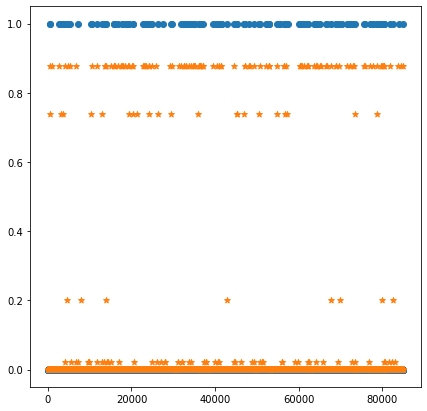

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter([i for i in range(0,len(y_test))], y_test,marker='o')
plt.scatter([i for i in range(0,len(y_test))], yhat[:,1],marker='*')
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: Avearge precision=0.66')

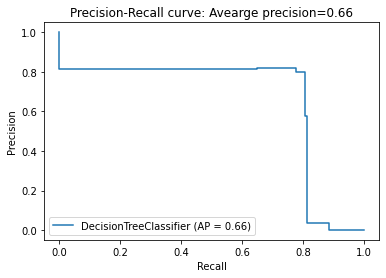

In [ ]:
average_precision = average_precision_score(y_test, yhat[:,1])
dthyp_pr_curve = plot_precision_recall_curve(dt_hyp, X_test, y_test)
dthyp_pr_curve.ax_.set_title('Precision-Recall curve: '
                   'Avearge precision={0:0.2f}'.format(average_precision))

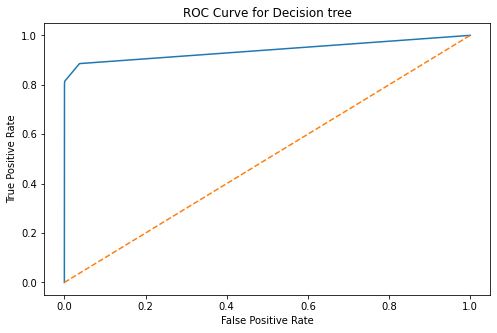

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat[:,1])
fig, ax = plt.subplots(figsize=(8,5))
plt.title('ROC Curve for Decision tree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Feature Selection Using Decision Tree**

In [ ]:
selector = RFECV(estimator=dt_hyp,step=3,cv=5,scoring='recall')
selector = selector.fit(X_train,y_train)
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 6
Selected Features: [False False False False False False False False False False  True False
 False False  True False  True  True False False False False False False
 False False False False  True  True]
Feature Ranking: [9 8 7 6 5 4 4 4 3 2 1 3 3 2 1 2 1 1 5 5 6 6 7 7 8 8 9 9 1 1]


In [ ]:
SelectedFeatures=creditdata[['V14','V10','V16','V17','V18','Amount']]
SelectedFeatures.head()

,V14,V10,V16,V17,V18,Amount
0,-0.311169,0.090794,-0.470401,0.207971,0.025791,149.62
1,-0.143772,-0.166974,0.463917,-0.114805,-0.183361,2.69
2,-0.165946,0.207643,-2.890083,1.109969,-0.121359,378.66
3,-0.287924,-0.054952,-1.059647,-0.684093,1.965775,123.50
4,-1.119670,0.753074,-0.451449,-0.237033,-0.038195,69.99


In [ ]:
X = SelectedFeatures
y = creditdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42) # 70% training and 30% test
print(X_train.shape)
print(X_test.shape)

(198087, 6)
(84895, 6)


In [ ]:
dt_feature=DecisionTreeClassifier()
dt_feature.fit(X_train,y_train)
y_pred=dt_feature.predict(X_test)
yhat=dt_feature.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.71      0.81      0.75       140

    accuracy                           1.00     84895
   macro avg       0.85      0.90      0.88     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
dt_fea=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
dt_fea.fit(X_train,y_train)
y_pred=dt_fea.predict(X_test)
yhat=dt_fea.predict_proba(X_test)
#There is an increase in precision and recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.82      0.81      0.82       140

    accuracy                           1.00     84895
   macro avg       0.91      0.91      0.91     84895
weighted avg       1.00      1.00      1.00     84895



**Algorithm Adjustment(Class weight)**

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2,class_weight={0:1,1:304})
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
#There is an increase in recall and decrease in recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113007
           1       0.54      0.83      0.65       186

    accuracy                           1.00    113193
   macro avg       0.77      0.92      0.83    113193
weighted avg       1.00      1.00      1.00    113193



**SMOTE and Tomek Link**

In [ ]:
from imblearn.combine import SMOTETomek
X_smt,y_smt=SMOTETomek(random_state=42).fit_sample(X_train,y_train)
X_train, X_test, y_train, y_test =train_test_split(X_smt,y_smt,test_size=0.3,random_state=42)

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)
dt.fit(X_smt,y_smt)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     67578
           1       0.97      0.96      0.97     67549

    accuracy                           0.97    135127
   macro avg       0.97      0.97      0.97    135127
weighted avg       0.97      0.97      0.97    135127



**Random Forest**

In [ ]:
from sklearn import ensemble
X =creditdata.drop('Class', axis=1)
y = creditdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=42, stratify=y)
rf = ensemble.RandomForestClassifier().fit(X_train, y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113034
           1       0.80      0.94      0.86       159

    accuracy                           1.00    113193
   macro avg       0.90      0.97      0.93    113193
weighted avg       1.00      1.00      1.00    113193



In [ ]:
# Create a Random Forest Classifier with specified criterion
rf = ensemble.RandomForestClassifier()
# Create the parameter grid
param_grid = {'max_depth': [9, 11, 13], 'max_features': ['sqrt','log2'], 'n_estimators': [100,200,300]}
# Create a GridSearchCV object
grid_rf=GridSearchCV(estimator=rf,param_grid=param_grid,scoring='recall',n_jobs=-1,cv=5,verbose=True)
grid_rf.fit(X_train,y_train)
rf_best = grid_rf.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 82.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 176.5min finished


In [ ]:
print(rf_best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
rf = ensemble.RandomForestClassifier(max_depth=11,max_features='sqrt',n_estimators=100).fit(X_train, y_train)
predict=rf.predict(X_test)
print("Train Accuracy:",rf.score(X_train,y_train))
print("Test Accuracy:",rf.score(X_test,y_test))
print(classification_report(predict,y_test))

Train Accuracy: 0.9997114065104336
Test Accuracy: 0.9995759455089979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113035
           1       0.80      0.94      0.86       158

    accuracy                           1.00    113193
   macro avg       0.90      0.97      0.93    113193
weighted avg       1.00      1.00      1.00    113193



**RF Class weight Adjustment**

In [ ]:
rf = ensemble.RandomForestClassifier(max_depth=11,max_features='sqrt',n_estimators=100,class_weight={0:1,1:304}).fit(X_train, y_train)
predict=rf.predict(X_test)
print("Train Accuracy:",rf.score(X_train,y_train))
print("Test Accuracy:",rf.score(X_test,y_test))
print(classification_report(predict,y_test))

Train Accuracy: 0.999782082467062
Test Accuracy: 0.9995317731661851
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113026
           1       0.81      0.90      0.85       167

    accuracy                           1.00    113193
   macro avg       0.90      0.95      0.92    113193
weighted avg       1.00      1.00      1.00    113193



**Model Performance Evaluatioon**

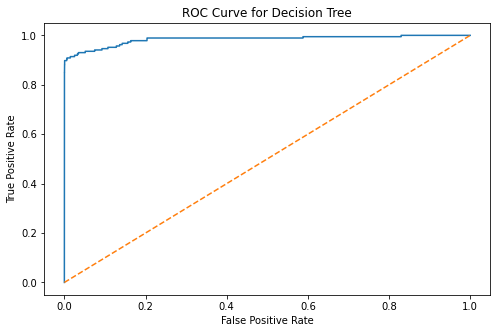

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob=rf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(8,5))
plt.title('ROC Curve for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate,label="AUC = %.2f" % auc)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('ROC_AUC_Score for RF: ', roc_auc_score(y_test, prob))

ROC_AUC_Score for RF:  0.9838365232109039


**SMOTE and Tomek Link in RF**

In [ ]:
from imblearn.combine import SMOTETomek
X_smt,y_smt=SMOTETomek(random_state=42).fit_sample(X_train,y_train)
X_train, X_test, y_train, y_test =train_test_split(X_smt,y_smt,test_size=0.4,random_state=42)

In [ ]:
rf = ensemble.RandomForestClassifier(max_depth=15,max_features='sqrt',n_estimators=50).fit(X_train, y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     67542
           1       0.96      0.94      0.95     67538

    accuracy                           0.95    135080
   macro avg       0.95      0.95      0.95    135080
weighted avg       0.95      0.95      0.95    135080



**Multilayer Perceptron Classifier**

In [ ]:
X =creditdata.drop('Class', axis=1)
y = creditdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=42, stratify=y)
mpc=MLPClassifier().fit(X_train,y_train)
y_mpc=mpc.predict(X_test)
y_hat=mpc.predict_proba(X_test)
print(classification_report(y_test,y_mpc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113007
           1       0.64      0.83      0.72       186

    accuracy                           1.00    113193
   macro avg       0.82      0.92      0.86    113193
weighted avg       1.00      1.00      1.00    113193



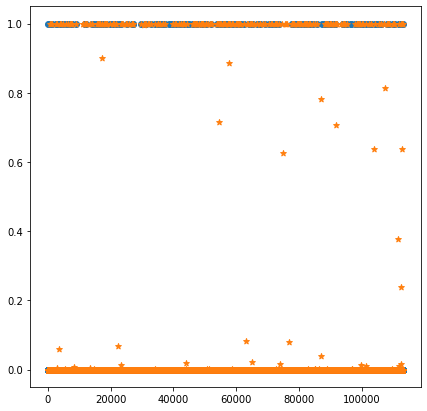

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter([i for i in range(0,len(y_test))], y_test,marker='o')
plt.scatter([i for i in range(0,len(y_test))], y_hat[:,1],marker='*')
plt.show()

**Artifical Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
creditdata['Amount(Normalized)'] = StandardScaler().fit_transform(creditdata['Amount'].values.reshape(-1,1))
creditdata['Time(Normalized)'] = StandardScaler().fit_transform(creditdata['Time'].values.reshape(-1,1))

In [ ]:
creditdata_normalized = creditdata.drop(columns = ['Amount', 'Time'], axis=1)
creditdata_normalized.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount(Normalized),Time(Normalized)
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.242005,-1.997561
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.343785,-1.997561
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.155155,-1.997540
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.137868,-1.997540
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075469,-1.997519


In [ ]:
X=creditdata_normalized.drop('Class',axis=1)
y=creditdata_normalized['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

def make_model(layers, activation):
  model= Sequential()
  for i,nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes, input_dim = X_train.shape[1]))
      model.add(Activation(activation))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

model=KerasClassifier(build_fn=make_model,verbose=0)

In [ ]:
loss=[]
optimizer=[]

In [ ]:
layers=[[20],[40,20],[45, 30, 25]]
activations=['sigmoid','relu']
param_grid={'layers':layers,'activation':activations,'batch_size':[30,60],'epochs':[15]}
ann_grid=GridSearchCV(estimator=model, param_grid=param_grid)
ann_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f92b16292d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['sigmoid', 'relu'],
                         'batch_size': [30, 60], 'epochs': [15],
                         'layers': [[20], [40, 20], [45, 30, 25]]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(ann_grid.best_params_)

{'activation': 'relu', 'batch_size': 30, 'epochs': 15, 'layers': [40, 20]}


In [ ]:
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=45,activation='relu'),
    Dropout(0.2),
    Dense(units=30,activation='relu'),
    Dense(units=25,activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.Recall(name='roc_auc')])
model.fit(X_train, y_train,batch_size=30, epochs=15)

Epoch 1/15
6603/6603 [==============================] - 13s 2ms/step - loss: 0.0072 - roc_auc: 0.5877
Epoch 2/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0035 - roc_auc: 0.7754
Epoch 3/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0033 - roc_auc: 0.7846
Epoch 4/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0031 - roc_auc: 0.7938
Epoch 5/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0030 - roc_auc: 0.8154
Epoch 6/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0029 - roc_auc: 0.7877
Epoch 7/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0026 - roc_auc: 0.8092
Epoch 8/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0027 - roc_auc: 0.7969
Epoch 9/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0027 - roc_auc: 0.7446
Epoch 10/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.00

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84755
           1       0.86      0.75      0.80       140

    accuracy                           1.00     84895
   macro avg       0.93      0.87      0.90     84895
weighted avg       1.00      1.00      1.00     84895



In [ ]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train,y_train_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197762
           1       0.92      0.77      0.84       325

    accuracy                           1.00    198087
   macro avg       0.96      0.89      0.92    198087
weighted avg       1.00      1.00      1.00    198087



In [ ]:
def data_array(creditdata: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X=creditdata_normalized.drop('Class',axis=1)
    y=creditdata_normalized['Class']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)
    xtrain=X_train.iloc[:,0:30].values
    xtest=X_test.iloc[:,0:30].values
    ytrain=y_train.values
    ytest= y_test.values
    return xtrain, xtest,ytrain,ytest

In [ ]:
X=creditdata_normalized.drop('Class',axis=1)
y=creditdata_normalized['Class']
kf = StratifiedKFold(n_splits=40,shuffle=True,random_state=42)
auc_score =[]
recall_scor=[]
precision_scor=[]
geo_score=[]
i=1
for train_index,test_index in kf.split(X,y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    xtrain,xtest = X.iloc[train_index],X.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

    #model
    model.fit(X_train, y_train,batch_size=30, epochs=15)
    score = roc_auc_score(ytest,model.predict(xtest).round())
    score1 = recall_score(ytest,model.predict(xtest).round())
    score2 = precision_score(ytest,model.predict(xtest).round())
    score3=geometric_mean_score(ytest,model.predict(xtest).round())
    #print('ROC AUC score:',score)
    auc_score.append(score)
    recall_scor.append(score1)
    precision_scor.append(score2)
    geo_score.append(score3)

    i+=1

Epoch 1/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0016 - roc_auc: 0.7538
Epoch 2/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0015 - roc_auc: 0.7692
Epoch 3/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0018 - roc_auc: 0.7662
Epoch 4/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0015 - roc_auc: 0.7877
Epoch 5/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0016 - roc_auc: 0.7631
Epoch 6/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0017 - roc_auc: 0.7600
Epoch 7/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0014 - roc_auc: 0.7785
Epoch 8/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0016 - roc_auc: 0.7662
Epoch 9/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.0015 - roc_auc: 0.7754
Epoch 10/15
6603/6603 [==============================] - 12s 2ms/step - loss: 0.00